# Interim Operational Capability 1

## Set up.

### Import packages.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

In [4]:
eere_color_lst = ["#6ABC45", "#FFCB06", "#00A8DF"]
pl.rcParams['axes.prop_cycle'] = pl.cycler(color=eere_color_lst)

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [5]:
designs = ty.Designs("data")

In [6]:
investments = ty.Investments("data")

### Compile the production and metric functions for each technology in the dataset.

In [7]:
designs.compile()

## Examine the input data.

### The `functions` table specifies where the Python code for each technology resides.

In [8]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
PV Generic,numpy,pv_residential_generic,capital_cost,fixed_cost,production,metrics,generic residential PV


### The `indices` table defines the subscripts for variables.

In [9]:
designs.indices.drop("Offset", axis = 1);

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [10]:
designs.designs.xs("Reference", level = "Scenario", drop_level = False);

### The `parameters` table contains additional techno-economic parameters for each technology.

In [11]:
designs.parameters.drop("Offset", axis = 1).xs("Reference", level = "Scenario", drop_level = False);

### The `results` table specifies the units of measure for results of computations.

In [12]:
designs.results;

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [17]:
investments.tranches.xs("CIGS", level="Category").reset_index()

,Tranche,Scenario,Amount,Notes
0,CIGS 0,CIGS 0,0.0,
1,CIGS 1,CIGS 1,1500000.0,
2,CIGS 2,CIGS 2,3000000.0,


In [18]:
# investments.tranches.reset_index()

In [19]:
data = investments.tranches.reset_index()
# g = sb.FacetGrid(data, row="Category")
# g.map(sb.barplot, x="Amount", y="Tranche");
# g.set_titles("")
# g.set(yticks=[], ylabel="", xlabel="", xticks=[])
# g.despine(bottom=True, left=True)

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [20]:
investments.investments

Notes
Investment   Category          Tranche                  
High R&D     CIGS              CIGS 2                   
             CdTe              CdTe 2                   
             GaAs              GaAs 2                   
             InGaP             InGaP 2                  
             Perovskite        Perovskite 2             
             Polysilicon       Polysilicon 2            
             Power Electronics Power Electronics 2      
             Soft Costs        Soft Costs 2             
Moderate R&D CIGS              CIGS 1                   
             CdTe              CdTe 1                   
             GaAs              GaAs 1                   
             InGaP             InGaP 1                  
             Perovskite        Perovskite 1             
             Polysilicon       Polysilicon 1            
             Power Electronics Power Electronics 1      
             Soft Costs        Soft Costs 1             
No R&D       CIGS              CIGS 0                   
             CdTe              CdTe 0                   
             GaAs              GaAs 0                   
             InGaP             InGaP 0                  
             Perovskite        Perovskite 0             
             Polysilicon       Polysilicon 0            
             Power Electronics Power Electronics 0      
             Soft Costs        Soft Costs 0

## Evaluate the scenarios in the dataset.

In [21]:
scenario_results = designs.evaluate_scenarios(sample_count=500)

#### Format results as a pivot table.

In [22]:
scenario_results.xs(
    "PV Generic"
).groupby(
    ["Scenario", "Variable", "Index"]
).aggregate(
    np.mean
).xs(
    "Metric", level = 1
).pivot_table(
    index = "Scenario", columns = "Index"
)

Value                                 \
Index                     Capital Efficiency       GHG Hazardous   
Scenario                                                           
CIGS 0              -7.868469e-01   0.234776 -0.000449  0.055367   
CIGS 1              -2.176618e-01   0.264557 -0.000449  0.044869   
CIGS 2               1.178949e-01   0.275095 -0.000449  0.037896   
CdTe 0              -4.337093e-01   0.234481 -0.000449  0.054137   
CdTe 1              -9.656931e-02   0.255275 -0.000449  0.045827   
CdTe 2               2.460156e-01   0.284745 -0.000449  0.036951   
GaAs 0              -2.390265e-01   0.312469 -0.000449  0.075703   
GaAs 1              -2.166882e-02   0.313187 -0.000449  0.074270   
GaAs 2               4.661460e-01   0.344638 -0.000449  0.066183   
InGaP 0              3.832049e-01   0.403663 -0.000449  0.023522   
InGaP 1              7.375721e-01   0.409806 -0.000449  0.018459   
InGaP 2              9.546926e-01   0.397500 -0.000449  0.018065   
Perovskite 0        -1.157996e+00   0.179950 -0.000449  0.025124   
Perovskite 1        -3.790038e-01   0.225057 -0.000449  0.016884   
Perovskite 2         3.475588e-01   0.294505 -0.000449  0.008591   
Polysilicon 0        2.171075e-01   0.232979 -0.000449  0.246899   
Polysilicon 1        3.340413e-01   0.244754 -0.000449  0.204658   
Polysilicon 2        5.742263e-01   0.275005 -0.000449  0.150144   
Power Electronics 1  2.908060e-01   0.232995 -0.000449  0.235052   
Power Electronics 2  3.688303e-01   0.232642 -0.000449  0.228202   
Reference           -4.304827e-07   0.208000 -0.000449  0.275327   
Soft Costs 1         3.008933e-01   0.232877 -0.000449  0.247030   
Soft Costs 2         4.730271e-01   0.233366 -0.000449  0.246463   

                                                                     
Index                        LCOE   Lifetime Strategic        Yield  
Scenario                                                             
CIGS 0              -6.223914e-02  25.001223  0.013752   967.010101  
CIGS 1              -3.978744e-02  25.001261  0.011813   956.610632  
CIGS 2              -2.160433e-02  25.001270  0.010528   991.777399  
CdTe 0              -1.355461e-02  25.001245  0.031663  1278.375320  
CdTe 1              -3.039086e-04  25.001249  0.025651  1318.046358  
CdTe 2               1.195944e-02  25.001255  0.021681  1350.940326  
GaAs 0              -7.463132e-03  25.001257  0.007301  1278.377546  
GaAs 1              -3.926506e-04  25.001290  0.006220  1282.336237  
GaAs 2               1.525990e-02  25.001251  0.004886  1290.170860  
InGaP 0             -1.455531e-03  20.507586  0.003084  1310.488261  
InGaP 1              1.245722e-02  20.499341  0.002380  1323.793358  
InGaP 2              2.046712e-02  20.502578  0.002377  1323.767027  
Perovskite 0        -8.033257e-02  17.501126  0.007649  1335.882401  
Perovskite 1        -4.450520e-02  17.519785  0.005173  1358.936378  
Perovskite 2        -1.398374e-02  17.510755  0.003573  1359.045268  
Polysilicon 0        6.808353e-03  25.001275  0.000000  1278.375449  
Polysilicon 1        1.166568e-02  25.001265  0.000000  1298.836570  
Polysilicon 2        2.104372e-02  25.001265  0.000000  1337.978504  
Power Electronics 1  1.283162e-02  25.001261  0.000000  1342.701502  
Power Electronics 2  1.734091e-02  25.001252  0.000000  1384.954544  
Reference           -1.946058e-07  25.000000  0.000000  1278.202148  
Soft Costs 1         9.430117e-03  25.001284  0.000000  1278.379286  
Soft Costs 2         1.481534e-02  25.001230  0.000000  1278.373370

#### Print the units for the columns.

In [23]:
designs.results.loc["PV Generic", "Metric"].transpose()

Index,Capital,Efficiency,GHG,Hazardous,LCOE,Lifetime,Strategic,Yield
Units,Δ$/Wdc,%/100,ΔgCO2e/system,g/kWh,Δ$/kWh,yr,g/kWh,hr/yr
Notes,,,,,,,,


### Save results.

In [24]:
scenario_results.to_csv("output/example-scenario.csv")

### Plot the results.

In [20]:
display(investments.tranches.head(2))
display(scenario_results.head(2))

Amount Notes
Category Tranche Scenario                 
CIGS     CIGS 0  CIGS 0          0.0      
         CIGS 1  CIGS 1    1500000.0

Value     Units
Technology Scenario Sample Variable Index                          
PV Generic CIGS 0   1      Cost     Cost     30067.234617  $/system
                           Metric   Capital     -0.745702    Δ$/Wdc

In [21]:
# https://stackoverflow.com/a/55262258 - move box plots closer together
# a,b = ax.get_ylim()
# ax.set_ylim(a+val, b-val)
data_all = investments.tranches.join(scenario_results).reset_index()
data_all["Category"].unique()

array(['CIGS', 'CdTe', 'GaAs', 'InGaP', 'Perovskite', 'Polysilicon',
       'Power Electronics', 'Soft Costs'], dtype=object)

In [32]:

# val=1
# sb.violinplot(x="Value", y="Category", hue="Tranche", data=data)
# sb.despine(offset=10, trim=True)
# ax.set_ylim(-val, 1+val)
# a,b = ax.get_ylim()
# ax.set_ylim(a+val, b-val)
# sb.kdeplot(x="Value", hue="Tranche", data=data, fill=True)
# data["diff"] = np.where(data["Scenario"] != data["Tranche"], True, False)
# data["Tranche"].unique()
# data[]
# scenario_results.xs(
#     "PV Generic"
# ).groupby(
#     ["Scenario", "Variable", "Index"]
# ).aggregate(
#     np.mean
# ).xs(
#     "Metric", level = 1
# )

In [ ]:
# tips = sns.load_dataset("tips")
# ax = sns.violinplot(x="day", y="total_bill", hue="sex",
#                     data=tips, palette="Set2", split=True,
#                     scale="count", inner="stick",
#                     scale_hue=False, bw=.2, width=2.5,
#                     order=('Thur', 'Fri', '', 'Sat', '', 'Sun'))

In [40]:
# df = pd.DataFrame(dict(x=np.repeat([0, 3, 5, 6], 10),
#                        y=np.random.randn(40)))
# sb.boxplot(x="x", y="y", data=df, order=np.arange(7))


In [38]:
# # import seaborn as sns, matplotlib.pyplot as plt
# scenario_list = ['None','Low','High']
# # tips = sns.load_dataset("tips")
# ax = sb.violinplot(y="Scenario", x="Value",
#                     data=data, palette="Set2",
#                     scale="count",
#                     bw=.2, width=2.5,
#                     order=scenario_list)

# # get rid of ticks for empty columns (levels)
# ax.set_yticks([0,1,3])
# ax.set_yticklabels(['Thur', 'Fri', 'Sat'])

# pl.show()

In [23]:
investment_level = {0: "None", 1: "Low", 2: "High"}

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0, label, fontweight="bold",
            ha="right", va="center", transform=ax.transAxes)

LINEWIDTH = 2

In [95]:
data = investments.tranches.join(scenario_results)
# data = data[data.index.get_level_values("Index").isin(["Capital", "Efficiency", "Hazardous", "LCOE", "Strategic", "Yield"])]
data = data[data.index.get_level_values("Index").isin(["Capital", "Efficiency", "Hazardous"])]
data = data.xs(["Metric","CIGS"], level=["Variable","Category"]).reset_index()
data.head()

,Scenario,Tranche,Technology,Sample,Index,Amount,Notes,Value,Units
0,CIGS 0,CIGS 0,PV Generic,1,Capital,0.0,,-0.745702,Δ$/Wdc
1,CIGS 0,CIGS 0,PV Generic,1,Efficiency,0.0,,0.237370,%/100
2,CIGS 0,CIGS 0,PV Generic,1,Hazardous,0.0,,0.054866,g/kWh
3,CIGS 0,CIGS 0,PV Generic,2,Capital,0.0,,-0.621044,Δ$/Wdc
4,CIGS 0,CIGS 0,PV Generic,2,Efficiency,0.0,,0.242632,%/100


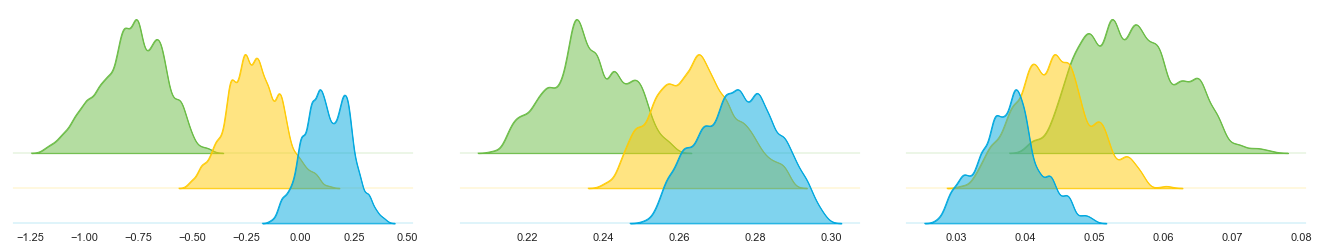

In [103]:
data_cigs = data[data['Category']=='CIGS']
g = sb.FacetGrid(data_cigs, col="Index", row="Scenario", hue="Scenario", sharex='col', sharey=False, aspect=5, height=1.25)
g.map(sb.kdeplot, "Value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=LINEWIDTH)
g.map(sb.kdeplot, "Value", clip_on=False, linewidth=LINEWIDTH, bw_adjust=.5)
g.map(pl.axhline, y=0, linewidth=LINEWIDTH/4, clip_on=False)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.75)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [33]:
investments.tranches.head(2)

Amount Notes
Category Tranche Scenario                 
CIGS     CIGS 0  CIGS 0          0.0      
         CIGS 1  CIGS 1    1500000.0

In [98]:
index_list = list(scenario_results.reset_index()["Index"].unique()[[1,2,4]])
category_list = list(investments.tranches.reset_index()["Category"].unique()[0:3])

data_mi = investments.tranches.join(scenario_results)
data_mi = data_mi[data_mi.index.get_level_values("Index").isin(index_list)]
data_mi = data_mi[data_mi.index.get_level_values("Category").isin(category_list)]

data = data_mi.xs("Metric", level="Variable").reset_index()
data["Amount"] = [investment_level[int(x[-1])] for x in data["Tranche"]]

data = data.drop(["Technology","Notes"], axis=1)
data["Scenario"] = [investment_level[int(x[-1])] for x in data["Tranche"]]
data.head()

,Scenario,Tranche,Category,Sample,Index,Amount,Value,Units
0,None,CIGS 0,CIGS,1,Capital,None,-0.745702,Δ$/Wdc
1,None,CIGS 0,CIGS,1,Efficiency,None,0.237370,%/100
2,None,CIGS 0,CIGS,1,Hazardous,None,0.054866,g/kWh
3,None,CIGS 0,CIGS,2,Capital,None,-0.621044,Δ$/Wdc
4,None,CIGS 0,CIGS,2,Efficiency,None,0.242632,%/100


In [99]:
data1 = data_mi.xs(["Metric",index_list[0],category_list[0]], level=["Variable","Index","Category"]).reset_index()
data1["Scenario"] = [investment_level[int(x[-1])] for x in data1["Tranche"]]
data1.head()

,Scenario,Tranche,Technology,Sample,Amount,Notes,Value,Units
0,None,CIGS 0,PV Generic,1,0.0,,-0.745702,Δ$/Wdc
1,None,CIGS 0,PV Generic,2,0.0,,-0.621044,Δ$/Wdc
2,None,CIGS 0,PV Generic,3,0.0,,-0.933412,Δ$/Wdc
3,None,CIGS 0,PV Generic,4,0.0,,-0.717961,Δ$/Wdc
4,None,CIGS 0,PV Generic,5,0.0,,-0.951652,Δ$/Wdc


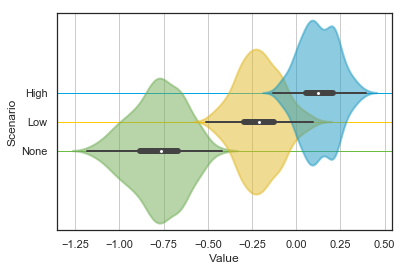

In [104]:
scenario_list = ["None","Low","High"]
WIDTH = 5

ax = sb.violinplot(
    data=data1,
    x="Value",
    y="Scenario",
    # hue="Scenario",
    # row="Category",
    # col="Index",
    # kind="violin",
    # height=2,
    # aspect=2,
    # sharex='col',
    # sharey='row',
    order=["None","Low","High"],
    linewidth=LINEWIDTH*2,
    split=True,
    scale="count",
    width=WIDTH,
    alpha=0.5,
    # bw=0.2,
    # color="b",
    # margin_titles=True,
)

alpha = 0.5
for violin in ax.collections[::2]:
    violin.set_alpha(alpha)
    violin.set_edgecolor(violin.get_facecolor())

ax.set_ylim(0-(WIDTH/2)*1.1,2+(WIDTH/2)*1.1)

ax.grid()

for ii, line in enumerate(ax.get_ygridlines()):
    line.set_color(eere_color_lst[ii])

2 Δ$/Wdc
2 %/100
2 g/kWh


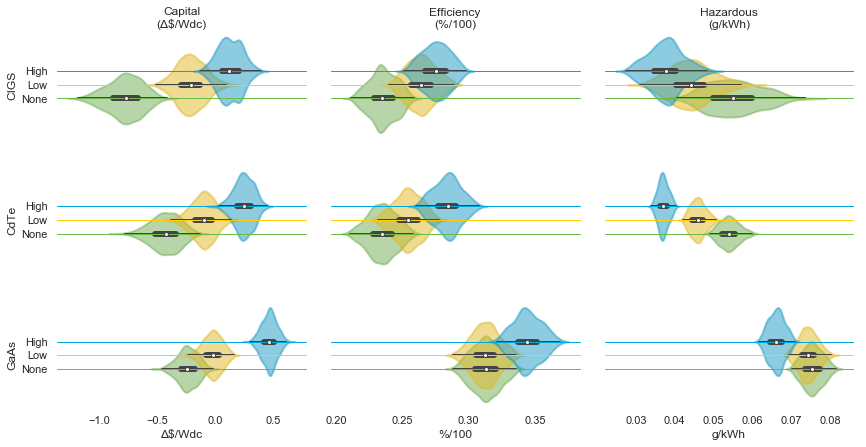

In [105]:
category_list = list(data["Category"].unique())
index_list = data[["Index","Units"]].drop_duplicates().values.tolist()
LINEWIDTH = 1

g = sb.catplot(
    data=data,
    x="Value",
    y="Scenario",
    row="Category",
    col="Index",
    kind="violin",
    height=2,
    aspect=2,
    sharex='col',
    sharey='row',
    order=["None","Low","High"],
    linewidth=LINEWIDTH*2,
    width=WIDTH,
    # bw=0.2,
    # color="b",
    # margin_titles=True,
)

for kk in range(len(data1["Scenario"].unique())):
    g.map(pl.axhline, y=kk, linewidth=LINEWIDTH, clip_on=False, color=eere_color_lst[kk])

(g.set_titles("")
  .set_ylabels("")
  .set_xlabels("")
  .despine(
      left=True,
      bottom=True,
  )
)

# g.fig.subplots_adjust(hspace=-0.75)
alpha = 0.5

ROW, COL = len(g.axes), len(g.axes[0])
for ii, cat in zip(range(ROW), category_list):
    for jj, idx in zip(range(COL), index_list):
        if ii==0:   g.axes[0,jj].set_title(idx[0] + "\n(" + idx[1] + ")")
        if ii==ROW-1:
            print(ii,idx[1])
            g.axes[ii,jj].set_xlabel(idx[1])
        g.axes[ii,jj].set_ylim(0-(WIDTH/2)*1.1,2+(WIDTH/2)*1.1)

        for violin in g.axes[ii,jj].collections[::2]:
            violin.set_alpha(alpha)
            violin.set_edgecolor(violin.get_facecolor())

        # g.axes[ii,jj].set_yticks([0.5,1.0,1.5])
    g.axes[ii,0].set_ylabel(cat)

In [106]:
# def aggregate_over(ser, idx, statistic = np.mean):
#     ser = ser.astype("float64")
#     idx_res = list(set(ser.index.names.copy()) - set(idx))
#     return ser.groupby(idx_res).aggregate(statistic)

In [107]:
np.std(list(range(500)))

144.33727862198316

In [108]:
def aggregate_over(df, idx, fun):
    if "Sample" in data.columns:
        df = df.drop("Sample", axis=1)
    
    idx = list(set(data.columns) - set(["Sample","Value"]))
    df = df.groupby(idx).aggregate(fun)
    return df.rename(columns={"Value": fun.__name__})

In [111]:
data

,Scenario,Tranche,Category,Sample,Index,Amount,Value,Units
0,None,CIGS 0,CIGS,1,Capital,None,-0.745702,Δ$/Wdc
1,None,CIGS 0,CIGS,1,Efficiency,None,0.237370,%/100
2,None,CIGS 0,CIGS,1,Hazardous,None,0.054866,g/kWh
3,None,CIGS 0,CIGS,2,Capital,None,-0.621044,Δ$/Wdc
4,None,CIGS 0,CIGS,2,Efficiency,None,0.242632,%/100
...,...,...,...,...,...,...,...,...
13495,High,GaAs 2,GaAs,499,Efficiency,High,0.326782,%/100
13496,High,GaAs 2,GaAs,499,Hazardous,High,0.069408,g/kWh
13497,High,GaAs 2,GaAs,500,Capital,High,0.527304,Δ$/Wdc
13498,High,GaAs 2,GaAs,500,Efficiency,High,0.369325,%/100


,Index,Scenario,Tranche,Amount,Category,Units,std,mean
0,Capital,High,CIGS 2,High,CIGS,Δ$/Wdc,0.102673,0.127525
1,Capital,High,CdTe 2,High,CdTe,Δ$/Wdc,0.083392,0.244327
2,Capital,High,GaAs 2,High,GaAs,Δ$/Wdc,0.063308,0.464017
3,Capital,Low,CIGS 1,Low,CIGS,Δ$/Wdc,0.120936,-0.210549
4,Capital,Low,CdTe 1,Low,CdTe,Δ$/Wdc,0.099182,-0.104751
5,Capital,Low,GaAs 1,Low,GaAs,Δ$/Wdc,0.078841,-0.023390
6,Capital,None,CIGS 0,None,CIGS,Δ$/Wdc,0.148906,-0.780454
7,Capital,None,CdTe 0,None,CdTe,Δ$/Wdc,0.126062,-0.429649
8,Capital,None,GaAs 0,None,GaAs,Δ$/Wdc,0.085944,-0.238103
9,Efficiency,High,CIGS 2,High,CIGS,%/100,0.010227,0.275504


In [113]:
data_mean

mean
Index      Scenario Tranche Amount Category Units           
Capital    High     CIGS 2  High   CIGS     Δ$/Wdc  0.127525
                    CdTe 2  High   CdTe     Δ$/Wdc  0.244327
                    GaAs 2  High   GaAs     Δ$/Wdc  0.464017
           Low      CIGS 1  Low    CIGS     Δ$/Wdc -0.210549
                    CdTe 1  Low    CdTe     Δ$/Wdc -0.104751
                    GaAs 1  Low    GaAs     Δ$/Wdc -0.023390
           None     CIGS 0  None   CIGS     Δ$/Wdc -0.780454
                    CdTe 0  None   CdTe     Δ$/Wdc -0.429649
                    GaAs 0  None   GaAs     Δ$/Wdc -0.238103
Efficiency High     CIGS 2  High   CIGS     %/100   0.275504
                    CdTe 2  High   CdTe     %/100   0.284009
                    GaAs 2  High   GaAs     %/100   0.344555
           Low      CIGS 1  Low    CIGS     %/100   0.264315
                    CdTe 1  Low    CdTe     %/100   0.254422
                    GaAs 1  Low    GaAs     %/100   0.312782
           None     CIGS 0  None   CIGS     %/100   0.235703
                    CdTe 0  None   CdTe     %/100   0.234817
                    GaAs 0  None   GaAs     %/100   0.313111
Hazardous  High     CIGS 2  High   CIGS     g/kWh   0.037689
                    CdTe 2  High   CdTe     g/kWh   0.037033
                    GaAs 2  High   GaAs     g/kWh   0.066197
           Low      CIGS 1  Low    CIGS     g/kWh   0.044193
                    CdTe 1  Low    CdTe     g/kWh   0.045986
                    GaAs 1  Low    GaAs     g/kWh   0.074371
           None     CIGS 0  None   CIGS     g/kWh   0.055362
                    CdTe 0  None   CdTe     g/kWh   0.054065
                    GaAs 0  None   GaAs     g/kWh   0.075522

In [110]:
# data_mean = aggregate_over(data, idx, np.mean)
# data_std = aggregate_over(data, idx, np.std)

# df = data_std.join(data_mean).reset_index()
# df_none = df[df["Amount"]==0].rename(columns={"std":"std0", "mean":"mean0"}).drop(["Amount","Scenario"], axis=1, inplace=False)
# df_some = df[df["Amount"]>0].rename(columns={"std":"std1", "mean":"mean1"})
# df = df_some.merge(df_none)

# df["Z"] = (df["mean1"] - df["mean0"]) / np.sqrt(df["std1"]**2 + df["std0"]**2)
# # df.head(2)
# # df

# # df_some.set_index(set(["std","mean"]))
# df

TypeError: '>' not supported between instances of 'str' and 'int'

In [534]:
0.010254*0.010254

0.00010514451599999998

In [118]:
data_none = data[data["Scenario"]=="None"].drop("Scenario", axis=1)

,Tranche,Category,Sample,Index,Amount,Value,Units
0,CIGS 0,CIGS,1,Capital,None,-0.745702,Δ$/Wdc
1,CIGS 0,CIGS,1,Efficiency,None,0.237370,%/100
2,CIGS 0,CIGS,1,Hazardous,None,0.054866,g/kWh
3,CIGS 0,CIGS,2,Capital,None,-0.621044,Δ$/Wdc
4,CIGS 0,CIGS,2,Efficiency,None,0.242632,%/100
...,...,...,...,...,...,...,...
10495,GaAs 0,GaAs,499,Efficiency,None,0.320439,%/100
10496,GaAs 0,GaAs,499,Hazardous,None,0.073653,g/kWh
10497,GaAs 0,GaAs,500,Capital,None,-0.234545,Δ$/Wdc
10498,GaAs 0,GaAs,500,Efficiency,None,0.309603,%/100


In [196]:
# data = investments.tranches.join(scenario_results).xs("Metric", level="Variable").reset_index()
range(len(g.axes))

range(0, 8)

/Users/chughes/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


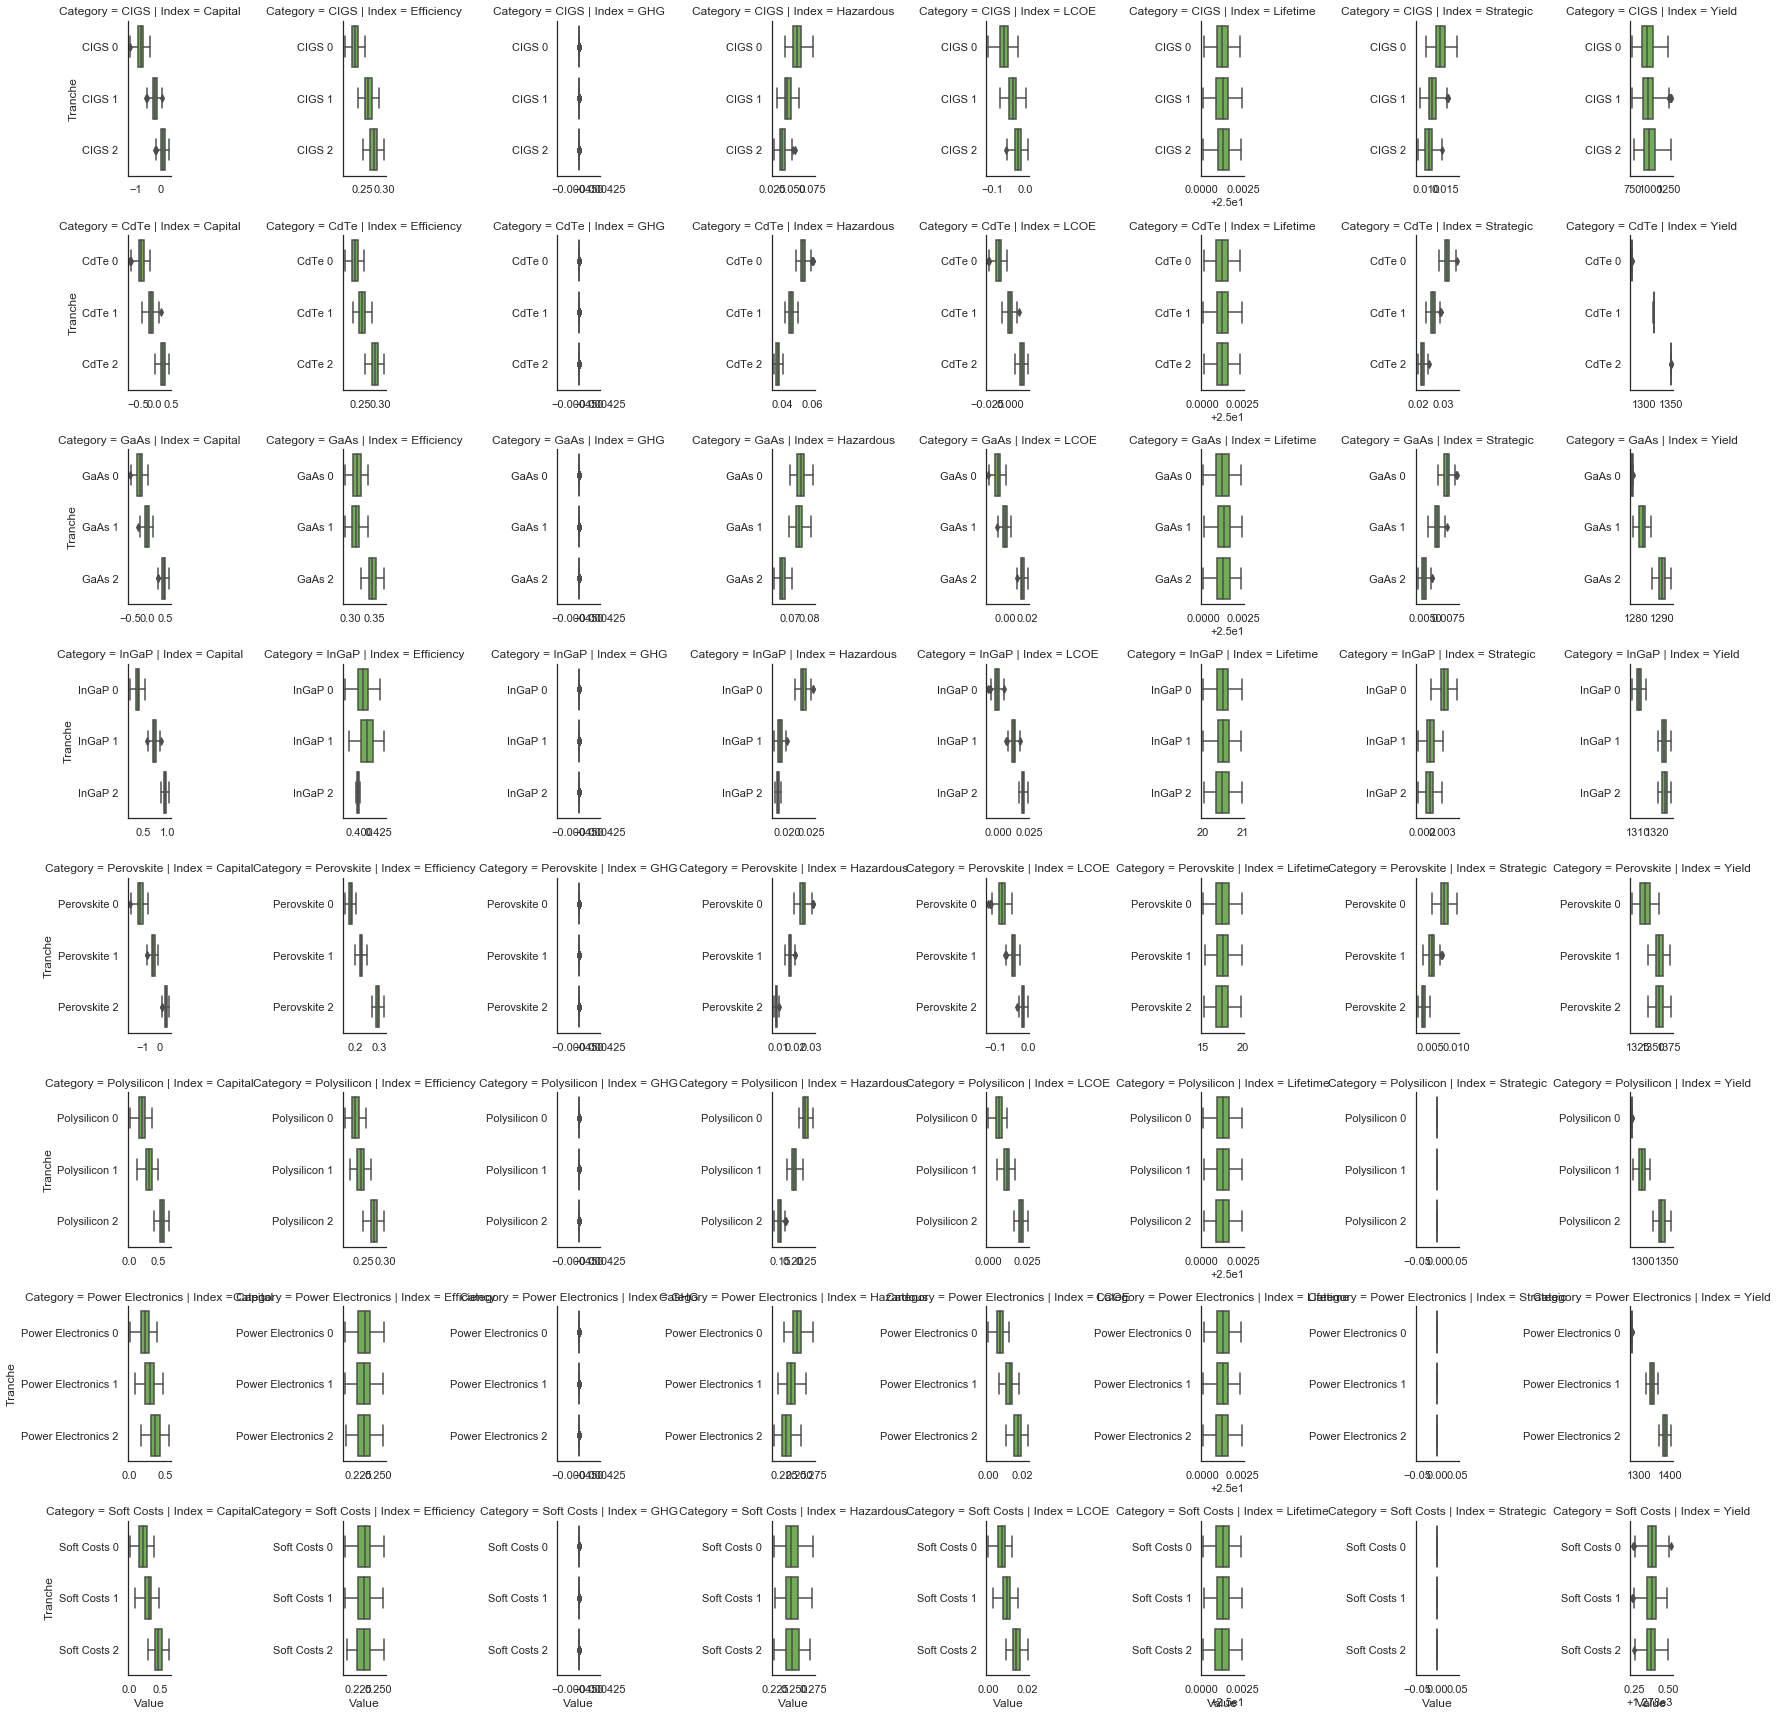

In [129]:
g = sb.FacetGrid(
    data = investments.tranches.join(scenario_results).xs("Metric", level="Variable").reset_index(),
    row = "Category",
    col = "Index",
    sharex = False,
    sharey = False,
)
g.map(
    sb.boxplot,
    "Value",
    "Tranche",
)

## Evaluate the investments in the dataset.

In [222]:
investment_results = investments.evaluate_investments(designs, sample_count=500)

### Costs of investments.

In [223]:
investment_results.amounts

,Amount
Investment,
High R&D,50000000.0
Moderate R&D,25000000.0
No R&D,0.0


### Benefits of investments.

In [224]:
investment_results.summary.set_index(
    "Units", append = True
).groupby(
    ["Investment", "Index", "Units"]
).aggregate(
    np.mean
).pivot_table(
    index = ["Index", "Units"],
    columns = "Investment",
)

Value                            
Investment                    High R&D  Moderate R&D        No R&D
Index      Units                                                  
Capital    Δ$/Wdc             3.546541      0.947475     -1.557325
Efficiency %/100              2.336683      2.177929      2.067340
GHG        ΔgCO2e/system     -0.003592     -0.003592     -0.003592
Hazardous  g/kWh              0.792875      0.888177      0.974603
LCOE       Δ$/kWh             0.065845     -0.037000     -0.142372
Lifetime   yr               188.058855    187.968057    188.109221
Strategic  g/kWh              0.042989      0.051045      0.063169
Yield      hr/yr          10321.478963  10174.707468  10008.971146

### Save results.

In [225]:
investment_results.amounts.to_csv("output/example-investment-amounts.csv")

In [226]:
investment_results.metrics.to_csv("output/example-investment-metrics.csv")

### Plot the results.

In [228]:
investment_results.summary

Value          Units
Investment Sample Index                                  
No R&D     1      Capital        -1.359600         Δ$/Wdc
                  Efficiency      2.075631          %/100
                  GHG            -0.003592  ΔgCO2e/system
                  Hazardous       0.974783          g/kWh
                  LCOE           -0.112292         Δ$/kWh
...                                    ...            ...
High R&D   500    Hazardous       0.782782          g/kWh
                  LCOE            0.069922         Δ$/kWh
                  Lifetime      187.873345             yr
                  Strategic       0.042723          g/kWh
                  Yield       10352.495433          hr/yr

[12000 rows x 2 columns]

In [229]:
g = sb.FacetGrid(
    data = b
    .reset_index(),
    col = "Index",
    sharex = False,
    col_wrap = 4
)
g.map(
    sb.violinplot,
    "Value",
    "Investment",
)

NameError: name 'b' is not defined

In [230]:
investment_results.summary

Value          Units
Investment Sample Index                                  
No R&D     1      Capital        -1.359600         Δ$/Wdc
                  Efficiency      2.075631          %/100
                  GHG            -0.003592  ΔgCO2e/system
                  Hazardous       0.974783          g/kWh
                  LCOE           -0.112292         Δ$/kWh
...                                    ...            ...
High R&D   500    Hazardous       0.782782          g/kWh
                  LCOE            0.069922         Δ$/kWh
                  Lifetime      187.873345             yr
                  Strategic       0.042723          g/kWh
                  Yield       10352.495433          hr/yr

[12000 rows x 2 columns]

In [231]:
investment_results.summary[
    investment_results.summary.index.get_level_values("Index").isin(["Capital", "Efficiency", "Hazardous", "LCOE", "Strategic", "Yield"])
]

Value   Units
Investment Sample Index                           
No R&D     1      Capital        -1.359600  Δ$/Wdc
                  Efficiency      2.075631   %/100
                  Hazardous       0.974783   g/kWh
                  LCOE           -0.112292  Δ$/kWh
                  Strategic       0.062645   g/kWh
...                                    ...     ...
High R&D   500    Efficiency      2.340278   %/100
                  Hazardous       0.782782   g/kWh
                  LCOE            0.069922  Δ$/kWh
                  Strategic       0.042723   g/kWh
                  Yield       10352.495433   hr/yr

[9000 rows x 2 columns]